In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def sample(x,p):
    dist = stats.rv_discrete(name='dist', values=(x, p))
    return dist.rvs()

In [3]:
def inverse_exp(t,lambd):
    #print(t)
    return -np.log(1-t)/lambd

In [4]:
def exp_kernel(t,alpha,beta):
    return alpha*np.exp(-beta*t)

In [5]:
def hawkes_intensity(t,past_t,mu,alpha,beta):
    num_proc = mu.shape[0]
    ans = np.array(mu)
    for i in range(num_proc):
        if past_t[i].shape[0] > 0:
            for j in range(num_proc):
                ans[j] += np.sum(exp_kernel(t - past_t[i],alpha[i,j],beta[i,j]))
    return ans

In [7]:
def mult_hawkes(alpha,beta,mu,num_proc = 5,time_lim = 1000):
    assert alpha.shape[0] == num_proc
    assert beta.shape[0] == num_proc
    assert mu.shape[0] == num_proc
    t = 0
    ans = []
    for i in range(num_proc):
        ans.append(np.array([]))
    #ans[0] = np.zeros(5000)
    #ans[1] = np.zeros(51)
    #ans[2] = np.zeros(51)
    #ans[3] = np.zeros(51)
    #ans[4] = np.zeros(51)
    intensities = np.array(mu)
    count = 0
    while t <= time_lim:
        intensities = hawkes_intensity(t,ans,mu,alpha,beta)
        Lambda = np.sum(intensities)
        u = inverse_exp(np.random.rand(),Lambda)
        if t+u > time_lim:
            break
        else:
            intensities_t = hawkes_intensity(t+u,ans,mu,alpha,beta)
            dist = np.append(intensities_t,Lambda - np.sum(hawkes_intensity(t+u,ans,mu,alpha,beta)))
            dist = dist/np.sum(dist)
            res = sample(np.arange(num_proc+1),dist)
            if res < num_proc:
                ans[res] = np.append(ans[res],t+u)
            t = t+u
        count += 1
        if count % 1000 == 0:
            print("finished "+str(t/time_lim))
        if count == 1000:
            ans[0] = np.append(ans[0],np.zeros(50)+t)
    return ans

In [66]:
def mult_hawkes_N(alpha,beta,mu,num_proc = 5,time_lim = 1000,capacity=10000):
    assert alpha.shape[0] == num_proc
    assert beta.shape[0] == num_proc
    assert mu.shape[0] == num_proc
    t = 0
    ans = []
    for i in range(num_proc):
        ans.append(np.array([]))
    #ans[0] = np.zeros(5000)
    intensities = np.array(mu)
    count = 0
    while t <= time_lim:
        scales = np.maximum(np.array(list(map(lambda x:(1-x.shape[0]/capacity),ans))),0)
        assert scales[0] >= 0
        intensities = scales*hawkes_intensity(t,ans,mu,alpha,beta)
        Lambda = np.sum(intensities)
        u = inverse_exp(np.random.rand(),Lambda)
        if t+u > time_lim:
            break
        else:
            intensities_t = scales*hawkes_intensity(t+u,ans,mu,alpha,beta)
            dist = np.append(intensities_t,Lambda - np.sum(intensities_t))
            dist = dist/np.sum(dist)
            res = sample(np.arange(num_proc+1),dist)
            if res < num_proc:
                ans[res] = np.append(ans[res],t+u)
            t = t+u
        count += 1
        if count % 1000 == 0:
            print("finished "+str(t/time_lim))
            print(scales)
        if min(scales) < 1e-6:
            break
    return ans

In [67]:
alpha = np.random.rand(5,5)+ np.eye(5)
#alpha = np.eye(5)*0.2
alpha[0,0] = 0.4001
beta = np.ones((5,5))*0.4
G = alpha/beta
mu = np.random.rand(5)*3
#mu = np.zeros(5)
print(G)
print(np.linalg.eigvalsh(G))

[[1.00025    0.16068924 1.75393571 2.1422624  1.19514177]
 [1.88365436 4.26719379 2.30245929 1.74324405 0.98809087]
 [2.1598159  0.47329856 2.67673418 2.0344367  0.49970166]
 [1.59883547 2.48013209 1.73555438 3.01914529 1.44283345]
 [2.13438622 0.90989569 0.30224741 1.01564131 4.93861575]]
[-1.19309326  0.70571664  2.96425653  4.22448098  9.20057812]


In [68]:
event_times = mult_hawkes_N(alpha,beta,mu,num_proc = 5,time_lim = 10)

finished 0.18302596215212005
[0.9816 0.9817 0.9802 0.9762 0.9804]
finished 0.20492203840498288
[0.9626 0.9625 0.9609 0.9538 0.9603]
finished 0.21845335479230524
[0.9435 0.9452 0.9423 0.9311 0.938 ]
finished 0.22820826551352083
[0.9223 0.926  0.9252 0.9102 0.9164]
finished 0.23576058072180794
[0.9035 0.9066 0.9041 0.8907 0.8952]
finished 0.24216040941221167
[0.8869 0.8878 0.8832 0.8686 0.8736]
finished 0.24802782205128385
[0.8675 0.8693 0.865  0.8466 0.8518]
finished 0.25329023412279267
[0.8456 0.8519 0.8458 0.8262 0.8307]
finished 0.257729319808088
[0.8268 0.8338 0.8252 0.8042 0.8102]
finished 0.2619721808288762
[0.8061 0.8149 0.8078 0.7822 0.7892]
finished 0.2658663048289211
[0.7847 0.7959 0.7881 0.7628 0.7687]
finished 0.2695898502158317
[0.7666 0.7784 0.7662 0.7389 0.7501]
finished 0.27299889682022976
[0.7438 0.7611 0.7467 0.7162 0.7324]
finished 0.27624721466138785
[0.724  0.7428 0.7276 0.6967 0.7091]
finished 0.27927296676064417
[0.7056 0.7219 0.7089 0.6753 0.6885]
finished 0.2823

In [362]:
def hawkes_intensity_all_hist(t,past_t,mu,alpha,beta):
    num_proc = mu.shape[0]
    ans = mu.copy()
    for i in range(num_proc):
        if past_t[i].shape[0] > 0:
            for j in range(num_proc):
                ans[j] += np.sum(exp_kernel(t - past_t[i][past_t[i]<=t],alpha[i,j],beta[i,j]))
    return ans

In [37]:
def hawkes_N_intensity_all_hist(t,past_t,mu,alpha,beta,capacity):
    num_proc = mu.shape[0]
    ans = np.zeros(mu.shape)
    for i in range(num_proc):
        if past_t[i].shape[0] > 0:
            for j in range(num_proc):
                ans[j] += (1- len(past_t[i][past_t[i]<=t])/capacity)*(mu[j] + np.sum(exp_kernel(t - past_t[i][past_t[i]<=t],alpha[i,j],beta[i,j])))
    return ans

In [48]:
time_axis = np.linspace(0,10000,1000)
funcs = np.zeros((5,1000))
count = 0
for t in time_axis:
    funcs[:,count] = hawkes_intensity_all_hist(t,event_times,mu,alpha,beta)
    count+=1
m_share = funcs/np.sum(funcs,0)
#stady_state = np.linalg.solve(np.eye(5)-G,mu)

NameError: name 'hawkes_intensity_all_hist' is not defined

In [72]:
time_axis = np.linspace(0,10,1000)
funcs = np.zeros((5,1000))
count = 0
for t in time_axis:
    funcs[:,count] = hawkes_N_intensity_all_hist(t,event_times,mu,alpha,beta,10000)
    count+=1
m_share = funcs/np.sum(funcs,0)
#stady_state = np.linalg.solve(np.eye(5)-G,mu)

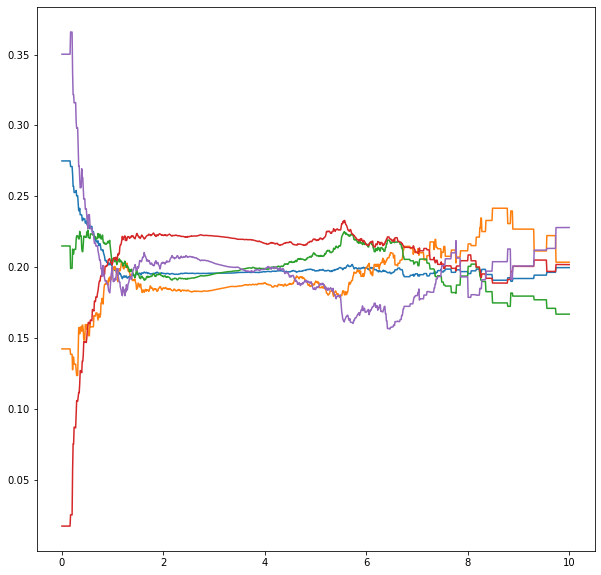

In [73]:
plt.figure(1,[10,10])
for i in range(5):
    plt.plot(time_axis,m_share[i,:])
    #plt.axhline(y=mu[i])
plt.savefig("1.jpg")

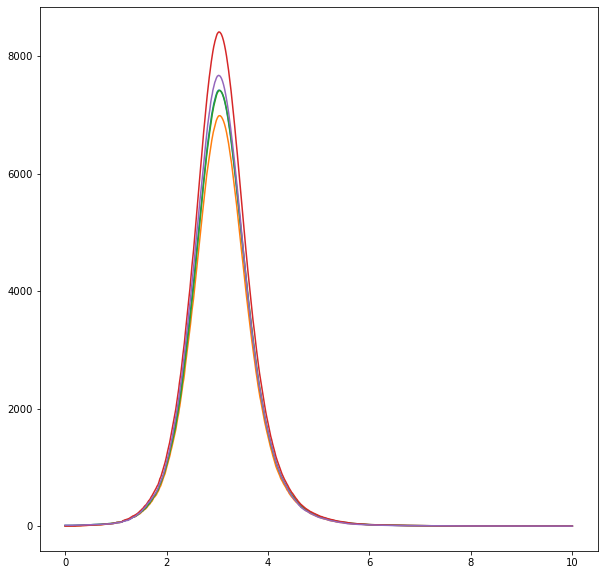

In [74]:
plt.figure(1,[10,10])
for i in range(5):
    plt.plot(time_axis,funcs[i,:])
plt.savefig("1.jpg")

In [75]:
print(np.linalg.eigvalsh(G))

[-1.19309326  0.70571664  2.96425653  4.22448098  9.20057812]


In [346]:
print(np.maximum(0,np.random.randn(10)))

[0.37170322 0.         0.84582205 0.         0.56250881 1.47228631
 0.         0.15563947 0.34577099 1.47630838]
